In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [58]:
def RSI(series, period):
    delta = series.diff().dropna()
    u = delta * 0
    d = u.copy()
    u[delta > 0] = delta[delta > 0]
    d[delta < 0] = -delta[delta < 0]
    u[u.index[period-1]] = np.mean( u[:period] ) #first value is sum of avg gains
    u = u.drop(u.index[:(period-1)])
    d[d.index[period-1]] = np.mean( d[:period] ) #first value is sum of avg losses
    d = d.drop(d.index[:(period-1)])
    rs = pd.DataFrame.ewm(u, com=period-1, adjust=False).mean() / \
         pd.DataFrame.ewm(d, com=period-1, adjust=False).mean()
    return 100 - 100 / (1 + rs)




,timestamp,ftr_vector
0,1.607814e+09,16.8
1,1.607814e+09,16.8
2,1.607814e+09,16.8
3,1.607815e+09,16.9
4,1.607816e+09,17.0
...,...,...
8534,1.615760e+09,17.1
8535,1.615761e+09,17.4
8536,1.615761e+09,17.4
8537,1.615762e+09,17.5


,timestamp,ftr_vector
0,1.607814e+09,16.8
1,1.607814e+09,16.8
2,1.607814e+09,16.8
3,1.607815e+09,16.9
4,1.607816e+09,17.0
...,...,...
8534,1.615760e+09,17.1
8535,1.615761e+09,17.4
8536,1.615761e+09,17.4
8537,1.615762e+09,17.5


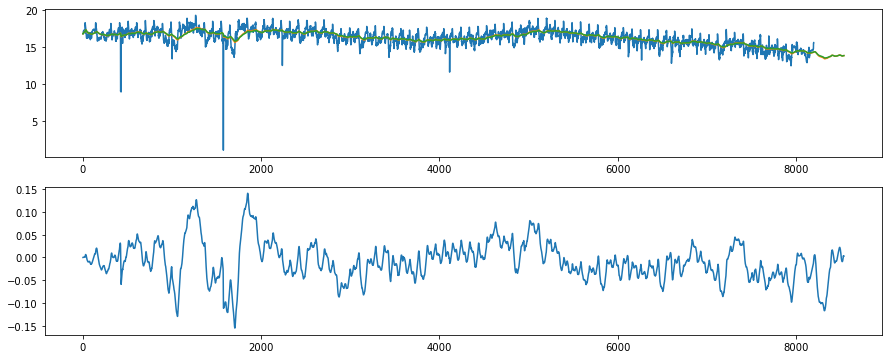

In [185]:
df = pd.read_csv("../data/consumer/braila_pressure5770.csv")

display(df)
values = df["ftr_vector"]

toplot = np.convolve(values, np.ones(1)/1, mode = 'valid')

for i in range(5000, len(toplot)):
    toplot[i] += -(i-5000)*0.001
    values[i] += -(i-5000)*0.001
    
    


toplot = pd.DataFrame(toplot)
fig, ax = plt.subplots(2, 1, figsize = (15, 6))
ax[0].plot(values[:8200])

def ema(values, period):
    return values.ewm(span=period).mean()

period1 = 200
period2 = 250

ax[0].plot(ema(toplot,period1))
ax[0].plot(ema(toplot,period2))

ax[1].plot((ema(toplot, period1) - ema(toplot, period2)))


,Timestamp,Value
0,2021-02-24 00:00:00,9212.88900
1,2021-02-24 00:00:15,9210.90605
2,2021-02-24 00:00:30,9208.92310
3,2021-02-24 00:00:45,9206.94015
4,2021-02-24 00:01:00,9204.95720
...,...,...
207355,2021-03-31 23:58:45,5931.60400
207356,2021-03-31 23:59:00,5931.60400
207357,2021-03-31 23:59:15,5931.60400
207358,2021-03-31 23:59:30,5931.60400


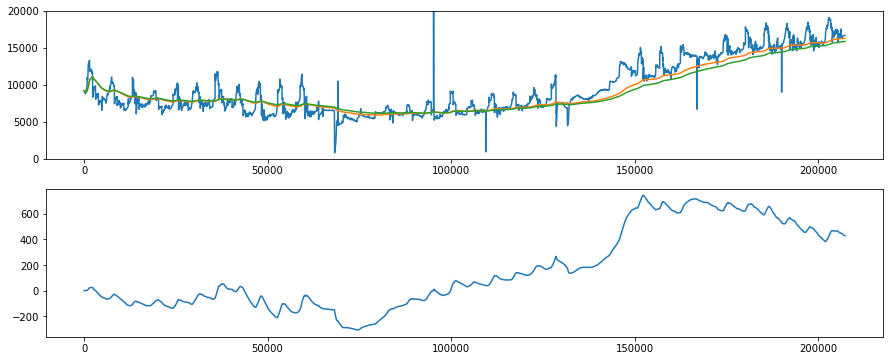

In [177]:
df = pd.read_csv("../data/consumer/conductivity_data.csv")
display(df)
values = df["Value"].values

toplot = np.convolve(values, np.ones(1)/1, mode = 'valid')

for i in range(100000, len(toplot)):
    toplot[i] += (i-100000)*0.1
    values[i] += (i-100000)*0.1
    
    


toplot = pd.DataFrame(toplot)
fig, ax = plt.subplots(2, 1, figsize = (15, 6))
ax[0].plot(toplot)
ax[0].set_ylim([0, 20000])

def ema(values, period):
    return values.ewm(span=period).mean()

period1 = 20000
period2 = 30000

ax[0].plot(ema(toplot,period1))
ax[0].plot(ema(toplot,period2))

ax[1].plot((ema(toplot, period1) - ema(toplot, period2)))